In [1]:
from em_examples.DCWidgetPlate2_5D import plate_app
%matplotlib inline

Efficiency Warning: Interpolation will be slow, use setup.py!

            python setup.py build_ext --inplace
    


# Purpose 

For a direct current resistivity (DCR) survey, currents are injected into the earth, and flow. 
Depending upon the subsurface conductivity structures current flow in the earth will be distorted and charges will accumulate on interfaces between regions of different conductivites. These changes can be measurable at the sufurface electrodes. 

Here, we focus on a plate target embedded in a halfspace, and investigate what is happening in the earth when static currents are injected. Different from the sphere case, which is symmetric, "coupling" between the Tx, target (conductor or resistor), and Rx will be significanlty different with various scenarios and geometries. 
Using this app we can investigate what effect different targets and survey geometries have on the currents, electric fields, potentials, charges, and sensitivities.

# Set up

<img src="../../images/DC_PlateApp_Setup.png">

# Questions

- Is the potential difference measured by a dipole over a conductive (/resisitive) target higher or lower compared to the half-space reference?
- how do the field lines bend in presence of a conductive (/resistive) target?
- Compared to the positive and negative sources (A and B), how are oriented the positive and negative accumulated charges around a conductive (/resistive) target?
- How would you describe the secondary fields pattern? Does it remind you one fundamental object of electromagnetics?

# Plate app

## Parameters:

 - **survey**: Type of survey
 - **A**: (+) Current electrode  location
 - **B**: (-) Current electrode  location
 - **M**: (+) Potential electrode  location
 - **N**: (-) Potential electrode  location
 - **dx**: width of plate
 - **dz**: height/thickness of plate
 - **xc**: x location of plate center
 - **zc**: z location of plate center
 - **$\theta$**: rotation angle of plate from the horizontal
 - **$\rho_1$**: Resistivity of the halfspace
 - **$\rho_2$**: Resistivity of the plate
 - **Field**: Field to visualize
 - **Type**: which part of the field
 - **Scale**: Linear or Log Scale visualization

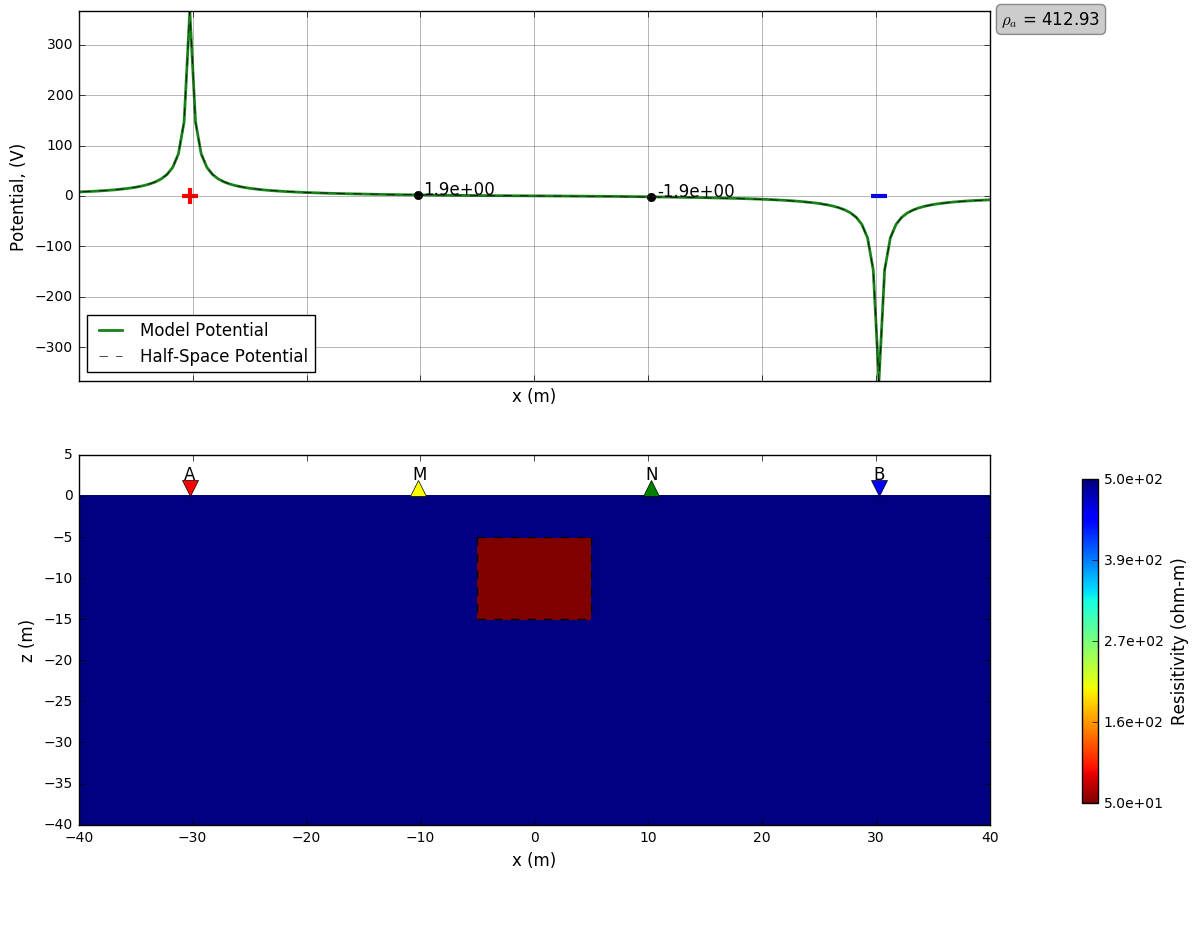

In [2]:
app = plate_app();
app

# Note: Sensitivity calculations will not work at this time since we have not set up the field object for the 2.5D 
# forumation.

# Computing Apparent Resistivity

In practice we cannot measure the potentials everywhere, we are limited to those locations where we place electrodes. For each source (current electrode pair) many potential differences are measured between M and N electrode pairs to characterize the overall distribution of potentials. The widget below allows you to visualize the potentials, electric fields, and current densities from a dipole source in a simple model with 2 layers. For different electrode configurations you can measure the potential differences and see the calculated apparent resistivities. 

In a uniform halfspace the potential differences can be computed by summing up the potentials at each measurement point from the different current sources based on the following equations:

\begin{align}
    V_M = \frac{\rho I}{2 \pi} \left[ \frac{1}{AM} - \frac{1}{MB} \right] \\
    V_N = \frac{\rho I}{2 \pi} \left[ \frac{1}{AN} - \frac{1}{NB} \right] 
\end{align} 
where $AM$, $MB$, $AN$, and $NB$ are the distances between the corresponding electrodes. 

The potential difference $\Delta V_{MN}$ in a dipole-dipole survey can therefore be expressed as follows,

\begin{equation}
    \Delta V_{MN} = V_M - V_N = \rho I \underbrace{\frac{1}{2 \pi} \left[ \frac{1}{AM} - \frac{1}{MB} - \frac{1}{AN} + \frac{1}{NB} \right]}_{G}
\end{equation}

and the resistivity of the halfspace $\rho$ is equal to,

$$
    \rho = \frac{\Delta V_{MN}}{IG}
$$

In this equation $G$ is often referred to as the geometric factor. 

In the case where we are not in a uniform halfspace the above equation is used to compute the apparent resistivity ($\rho_a$) which is the resistivity of the uniform halfspace which best reproduces the measured potential difference.

In the top plot the location of the A electrode is marked by the red +, the B electrode is marked by the blue -, and the M/N potential electrodes are marked by the black dots. The $V_M$ and $V_N$ potentials are printed just above and to the right of the black dots. The calculted apparent resistivity is shown in the grey box to the right. The bottom plot can show the resistivity model, the electric fields (e), potentials, or current densities (j) depending on which toggle button is selected. Some patience may be required for the plots to update after parameters have been changed.